In [1]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
# weight decay（가중치 감쇠） 설정
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1

In [4]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [8]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

epoch마다 train acc와 test acc 확인

In [9]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.09, test acc:0.1032
epoch:1, train acc:0.09666666666666666, test acc:0.1038
epoch:2, train acc:0.09333333333333334, test acc:0.1052
epoch:3, train acc:0.10333333333333333, test acc:0.11
epoch:4, train acc:0.10333333333333333, test acc:0.1136
epoch:5, train acc:0.11, test acc:0.1154
epoch:6, train acc:0.11666666666666667, test acc:0.121
epoch:7, train acc:0.15333333333333332, test acc:0.1285
epoch:8, train acc:0.15666666666666668, test acc:0.1361
epoch:9, train acc:0.17, test acc:0.1402
epoch:10, train acc:0.2, test acc:0.1572
epoch:11, train acc:0.21333333333333335, test acc:0.165
epoch:12, train acc:0.25666666666666665, test acc:0.1903
epoch:13, train acc:0.2866666666666667, test acc:0.2089
epoch:14, train acc:0.31666666666666665, test acc:0.2305
epoch:15, train acc:0.33666666666666667, test acc:0.2481
epoch:16, train acc:0.3433333333333333, test acc:0.2492
epoch:17, train acc:0.36666666666666664, test acc:0.2649
epoch:18, train acc:0.3933333333333333, test acc:0.

epoch:160, train acc:0.86, test acc:0.7175
epoch:161, train acc:0.86, test acc:0.7119
epoch:162, train acc:0.85, test acc:0.7002
epoch:163, train acc:0.8433333333333334, test acc:0.6957
epoch:164, train acc:0.8533333333333334, test acc:0.7033
epoch:165, train acc:0.8566666666666667, test acc:0.7083
epoch:166, train acc:0.8466666666666667, test acc:0.7058
epoch:167, train acc:0.8566666666666667, test acc:0.7111
epoch:168, train acc:0.8533333333333334, test acc:0.7062
epoch:169, train acc:0.85, test acc:0.7024
epoch:170, train acc:0.8533333333333334, test acc:0.7052
epoch:171, train acc:0.84, test acc:0.7006
epoch:172, train acc:0.85, test acc:0.708
epoch:173, train acc:0.8466666666666667, test acc:0.7057
epoch:174, train acc:0.8533333333333334, test acc:0.7133
epoch:175, train acc:0.8433333333333334, test acc:0.702
epoch:176, train acc:0.8533333333333334, test acc:0.7088
epoch:177, train acc:0.8533333333333334, test acc:0.7119
epoch:178, train acc:0.8566666666666667, test acc:0.7089
epo

그래프로 표현하기

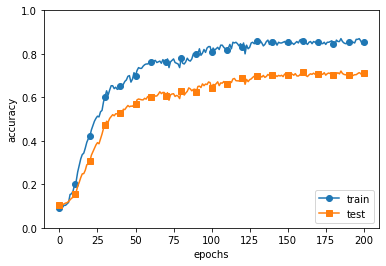

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()